# Linear Regression models for height data

In [1]:
#import libraries 
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
#read in dataframe for HR
df = pd.read_csv("experiment1.csv")
df.head()

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,F
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,F
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,F
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,F
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,F


In [4]:
#replace categorical variable with numeric values
df['gender'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,1
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,1
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,1
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,1
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,1


In [5]:
#remove whitespaces from column names
df.columns = df.columns.str.replace(' ', '')

In [23]:
#get means for all vowels per speaker in new dataframe
df_means = df.groupby(['speaker', 'vowel'], as_index=False)['f0', 'f1', 'f2', 'f3', 'f4', 'trueheight', 'gender'].mean()
df_means.head()

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,speaker,vowel,f0,f1,f2,f3,f4,trueheight,gender
0,11,a,217.339792,920.814000,1694.221143,2704.717143,4111.205714,69,1
1,11,v,200.395236,723.055915,1595.274225,2775.649296,3969.004507,69,1
2,12,a,181.303577,876.306230,1895.784754,3113.108852,4332.837213,58,1
3,12,v,190.865540,784.535692,1686.695538,3161.331077,4246.080462,58,1
4,13,a,228.015409,823.374833,1794.138167,2941.212500,4211.311667,68,1


In [24]:
import statsmodels.api as sm
from patsy import dmatrices

#build model
y, X = dmatrices('trueheight ~ f0 + f1 + f2 + f3 + f4', data=df_means, return_type='dataframe')

In [25]:
#describe model
mod = sm.OLS(y, X)

#fit model
res = mod.fit()       

#print summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             trueheight   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8.158
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           8.63e-06
Time:                        13:57:54   Log-Likelihood:                -151.58
No. Observations:                  60   AIC:                             315.2
Df Residuals:                      54   BIC:                             327.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.4910      6.511     14.667      0.0

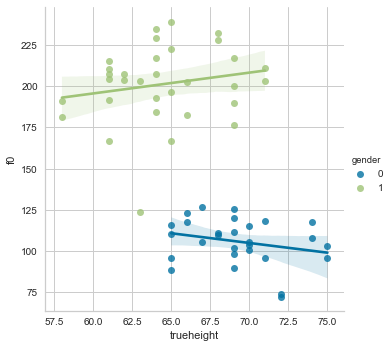

In [26]:
#make gendered plot for f0 (0=male, 1=female)
gendered = sns.lmplot( x="trueheight", y="f0", data=df_means, hue='gender', legend=True)

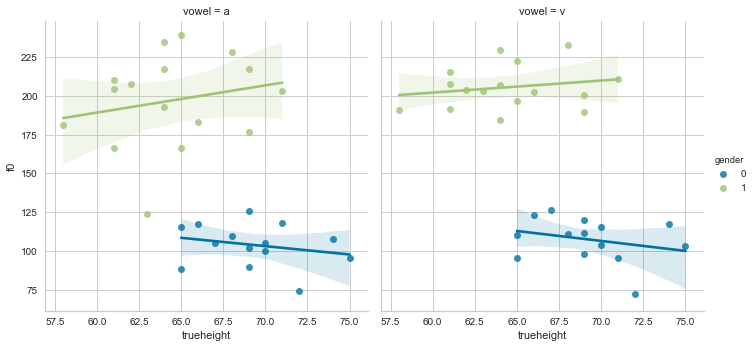

In [27]:
sns.lmplot(x="trueheight", y="f0", hue="gender", col="vowel", data=df_means)

## Prediction using linear regression

In [35]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Height')
    plt.ylabel('Proportion of Speakers')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Height')
    plt.legend()

In [36]:
y_data = df_means['trueheight']
x_data=df_means.drop('trueheight',axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 9
number of training samples: 51


In [38]:
#fit LR
lr = LinearRegression()
lr.fit(x_train[['f1', 'f2', 'f3', 'f4', 'f0']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#Predict using training data (51 samples):
yhat_train = lr.predict(x_train[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_train[0:5]

array([68.02426253, 63.30111579, 65.6795523 , 70.39528294, 64.1024613 ])

In [40]:
#Predict using test data (9 samples):
yhat_test = lr.predict(x_test[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_test[0:5]

array([71.14233626, 68.02162314, 62.76182844, 69.44709209, 68.1047975 ])

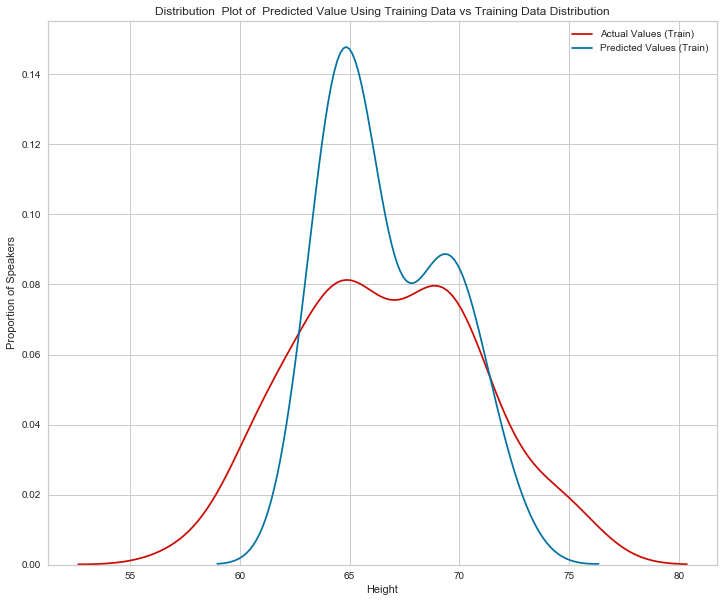

In [41]:
#examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

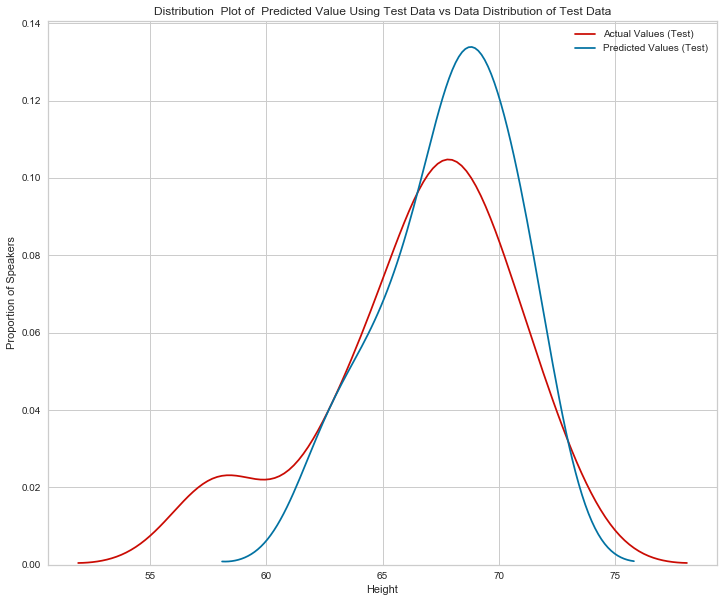

In [42]:
#what happens when the model encounters new data from the testing dataset?

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)